In [1]:
from sklearn import model_selection, preprocessing, linear_model, naive_bayes, metrics, svm
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn import decomposition, ensemble

import pandas as pd, mysql.connector
import xgboost, numpy, textblob, string
from keras.preprocessing import text, sequence
from keras import layers, models, optimizers

Using TensorFlow backend.


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df1 = pd.read_csv('\\Users\\Daniel\\Python\\Data\\Flix_products\\product_title.csv', engine='python')

In [4]:
df1.head()

,product_id,title,Categories
0,400002,HP Photosmart eStation Printer,Printers and Multifunction | Inkjet All-in-One...
1,400004,HP LaserJet Pro M1217nfw Multifunction Printer,Printers and Multifunction | Laser Multifuncti...
2,400006,HP LaserJet 9050dn Printer,Printers and Multifunction | Black and White L...
3,400008,HP Photosmart Premium All-in-One Printer - C309g,HP Photosmart Premium All-in-One Printer serie...
4,400010,HP Photosmart Premium Fax e-All-in-One Printer...,HP Photosmart Premium Fax e-All-in-One Printer...


In [5]:
products_complete = pd.read_csv('\\Users\\Daniel\\Python\\Data\\Flix_products\\products.csv', sep='\t')

C:\Users\Daniel\AppData\Local\Continuum\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3044: DtypeWarning: Columns (28) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [6]:
products= products_complete[['product_id','product_title','mpn_list','manufacturer_id', 'brand_title',
                            'flix_parent_category', 'flix_subCategory1', 'flix_subCategory2',
                            'benchmark_category', 'benchmark_category2']]
products.head()

,product_id,product_title,mpn_list,manufacturer_id,brand_title,flix_parent_category,flix_subCategory1,flix_subCategory2,benchmark_category,benchmark_category2
0,3,Crematic Coffee Maker,F8744338,53.0,Groupe SEB,Small Gadgets/Appliances,Drink Makers,Coffee/Espresso,Home Appliances,Drink Makers
1,4,Vitamin Plus 3-Tier Steamer,vc400415,4.0,Tefal,Small Gadgets/Appliances,Cooking,Steamers,Home Appliances,Steamers
2,5,DCDA1100 HIFi system,dc-da1100,5.0,Sanyo,Home Entertainment,Hi-Fi Systems,Standard Hi-Fi Systems,Audio,Hi-Fi/Radio
3,6,NNA574S Microwave,NNA574S,6.0,Panasonic,Home Appliances,Microwaves,None,Home Appliances,Microwaves
4,12,Soprano Jug Kettle,43003,7.0,Morphy Richards,Small Gadgets/Appliances,Kettles,None,Home Appliances,Kettles & Toasters


In [45]:
#products.groupby('benchmark_category2')['product_id'].count().sort_values(ascending=False)

In [7]:
products = pd.merge(products, df1, on='product_id', how='inner')
products.head()

,product_id,product_title,mpn_list,manufacturer_id,brand_title,flix_parent_category,flix_subCategory1,flix_subCategory2,benchmark_category,benchmark_category2,title,Categories
0,881868,HP EliteBook 840 G1 Notebook PC,J8Q77EA,28.0,HP,Computing/Gaming,Laptops/Notebook/Ebook/Ultrabook,Notebooks,Computing,Laptops,HP EliteBook 840 G1 Notebook PC,Laptops And Hybrids | Business Laptop PCs | HP...
1,876236,Speedlight SB-N7,FSA90901,1290.0,Nikon,Cameras,Camera Accessories,None,Cameras,Cameras Accessories,Speedlight SB-N7,Speedlights
2,888696,Electrolux EFC60465OX Chimney Design Hood 60 c...,EFC60465OX,1307.0,Electrolux Major,Home Appliances,Cooker Hoods,None,Home Appliances,Cookers/Ovens,Electrolux EFC60465OX Chimney Design Hood 60 c...,Electrolux | NonStar | Cooker_Hood
3,888693,Electrolux EFC90468OX Chimney Design Hood 90 c...,EFC90468OX,1307.0,Electrolux Major,Home Appliances,Cooker Hoods,None,Home Appliances,Cookers/Ovens,Electrolux EFC90468OX Chimney Design Hood 90 c...,Electrolux | NonStar | Cooker_Hood
4,888664,Oven EVY9841AOX,EVY9841AOX,1307.0,Electrolux Major,Home Appliances,Cookers/Ovens,None,Home Appliances,Cookers/Ovens,Electrolux EVY9841AOX Steam Cooking Built-in C...,Electrolux | NonStar | Oven


In [45]:
products['benchmark_category2'].isna().sum(), products['benchmark_category2'].isna().sum()/len(products.index)

(1680, 0.023105805333590065)

In [46]:
products.dropna(subset=['benchmark_category2'], inplace=True)

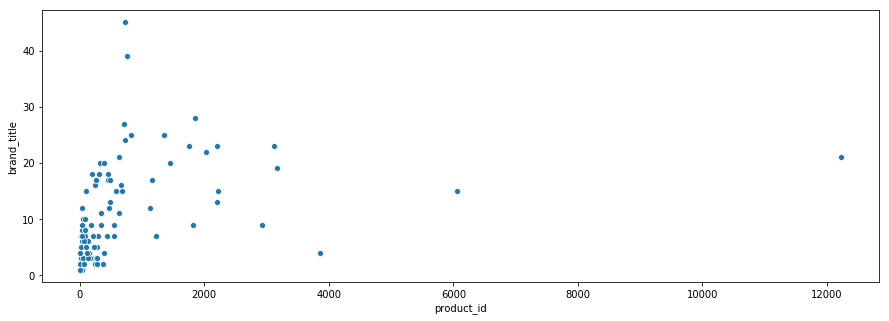

In [53]:
group_products = products.groupby('benchmark_category2')['product_id'].count()
group_brand  = products.groupby('benchmark_category2')['brand_title'].nunique()
plt.figure(figsize=(15,5))
ax = sns.scatterplot(x=group_products, y=group_brand)

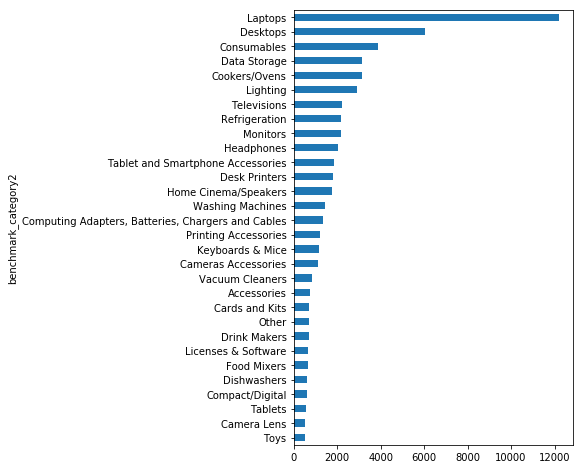

In [81]:
products.groupby('benchmark_category2')['product_id'].count().sort_values().tail(30).plot.barh(figsize=(5,8))

In [92]:
top15cats = products.groupby('benchmark_category2')['product_id'].count().nlargest(15).keys()

In [94]:
prod_15cats = products[products['benchmark_category2'].isin(top15cats)]

In [95]:
prod_15cats.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48227 entries, 0 to 71190
Data columns (total 12 columns):
product_id              48227 non-null int64
product_title           47698 non-null object
mpn_list                47976 non-null object
manufacturer_id         48227 non-null float64
brand_title             48227 non-null object
flix_parent_category    48227 non-null object
flix_subCategory1       48227 non-null object
flix_subCategory2       40661 non-null object
benchmark_category      48227 non-null object
benchmark_category2     48227 non-null object
title                   48227 non-null object
Categories              48227 non-null object
dtypes: float64(1), int64(1), object(10)
memory usage: 4.8+ MB
